# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.774934e+01     1.441534e+01
 * time: 0.0017559528350830078
     1     3.108177e+01     7.002658e+00
 * time: 0.0072269439697265625
     2     2.766359e+01     5.389484e+00
 * time: 0.012452125549316406
     3     2.375612e+01     4.184737e+00
 * time: 0.017855167388916016
     4     2.105170e+01     2.255267e+00
 * time: 0.023295164108276367
     5     1.995452e+01     3.881889e+00
 * time: 0.027990102767944336
     6     1.925494e+01     1.802667e+00
 * time: 0.03331613540649414
     7     1.849250e+01     1.879351e+00
 * time: 0.03765296936035156
     8     1.808853e+01     1.195876e+00
 * time: 0.04213905334472656
     9     1.775445e+01     8.630241e-01
 * time: 0.0473940372467041
    10     1.750098e+01     8.145518e-01
 * time: 0.05294394493103027
    11     1.738718e+01     6.935405e-01
 * time: 0.05837702751159668
    12     1.737967e+01     1.374162e+00
 * time: 0.11464595794677734
    13     1.728993e+01     8.772722e-01
 

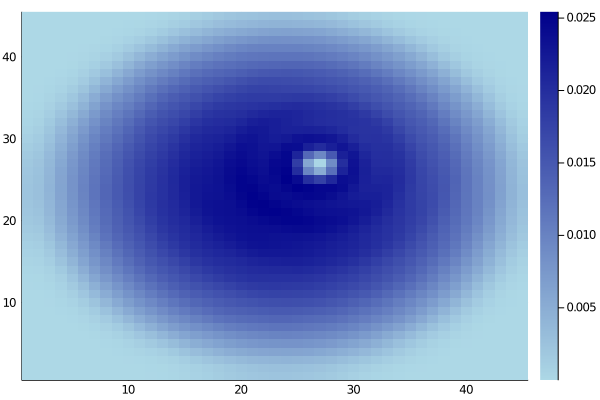

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)